# Laboratorium 9 - Zastosowania DFT

## Import zależności 

In [1]:
import matplotlib as ml
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from skimage import measure

from PIL import Image
import PIL.ImageOps    

import numpy as np 
from numpy import fft

## Zadanie 1

In [2]:
path_to_image_galia = 'img/galia.png'
path_to_pattern_galia = 'img/galia_e.png'

In [3]:
path_to_image_fish = 'img/school.jpg'
path_to_pattern_fish = 'img/fish1.png'

### Funkcje pomocnicze 

In [4]:
def read_img(path, invert=False):
    img = Image.open(path)
    if invert:
        img = PIL.ImageOps.invert(img)
    img = np.asarray(img)
    gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
    normalised = gray_img * 255 / np.max(gray_img)
    return normalised

In [5]:
def show_img(img, cmap='gray', scale=50):
    plt.figure(figsize=(img.shape[0] // scale, img.shape[1] // scale))
    plt.imshow(img, cmap=cmap, interpolation='none')
    plt.show()

In [6]:
def show_hist(freq):
    freq = np.abs(freq)
    fig, ax = plt.subplots(nrows=2, figsize=(6, 9))
    ax[0].hist(freq.ravel(), bins=100)
    ax[0].set_title('hist(freq)')
    ax[1].hist(np.log(freq).ravel(), bins=100)
    ax[1].set_title('hist(log(freq))')
    plt.show()

In [7]:
def show_module(freq, scale=50):
    fig, ax = plt.subplots(figsize=(freq.shape[0] // scale, freq.shape[1] // scale) if scale is not None else None)
    ax.imshow(np.angle(freq), interpolation="none", cmap='gray')
    ax.set_title('log(freq)')
    plt.show()

In [8]:
def show_phase(freq, scale=1):
    freq = np.abs(freq)
    fig, ax = plt.subplots(figsize=(freq.shape[0] // scale, freq.shape[1] // scale) if scale is not None else None)
    ax.imshow(np.log(freq), interpolation="none", cmap='gray')
    ax.set_title('log(freq)')
    plt.show()

### Dane

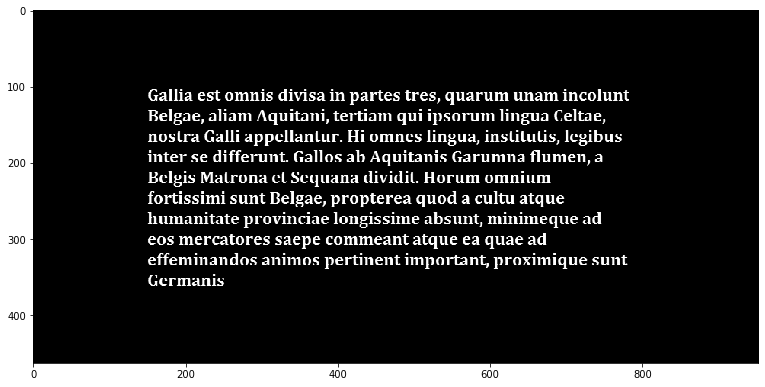

In [9]:
img_galia = read_img(path_to_image_galia, invert=True)
show_img(img_galia, scale=35)

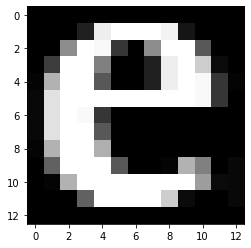

In [10]:
pattern_galia = read_img(path_to_pattern_galia, invert=True)
show_img(pattern_galia, scale=3)

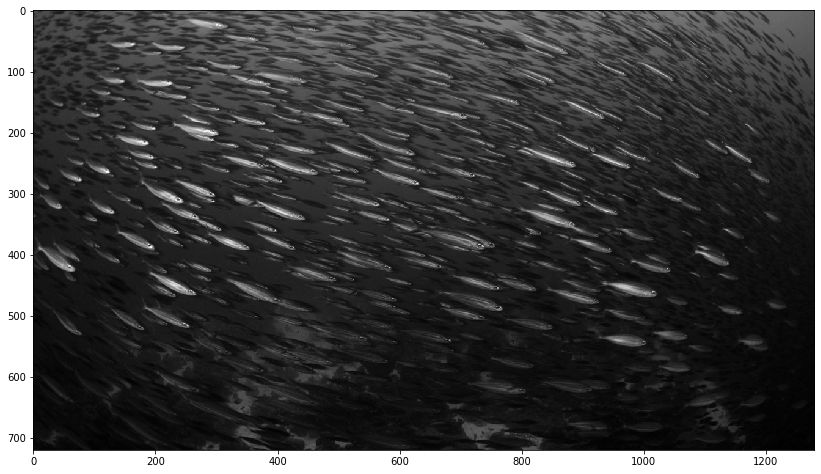

In [11]:
img_fish = read_img(path_to_image_fish)
show_img(img_fish, scale=50)

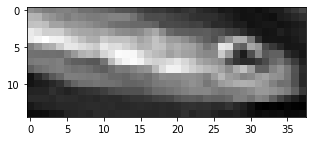

In [12]:
pattern_fish = read_img(path_to_pattern_fish)
show_img(pattern_fish, scale=3)

## Domena częstotliwości


In [13]:
freq_img_galia = fft.fft2(img_galia)

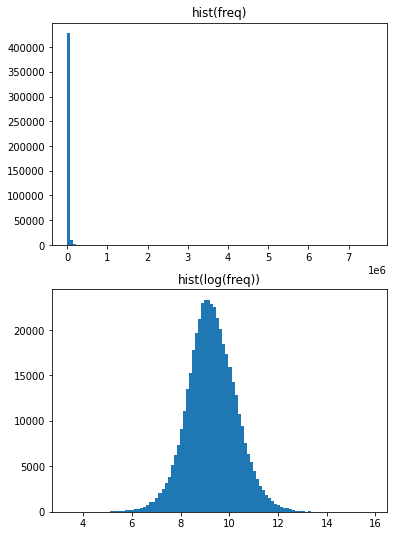

In [14]:
show_hist(freq_img_galia)

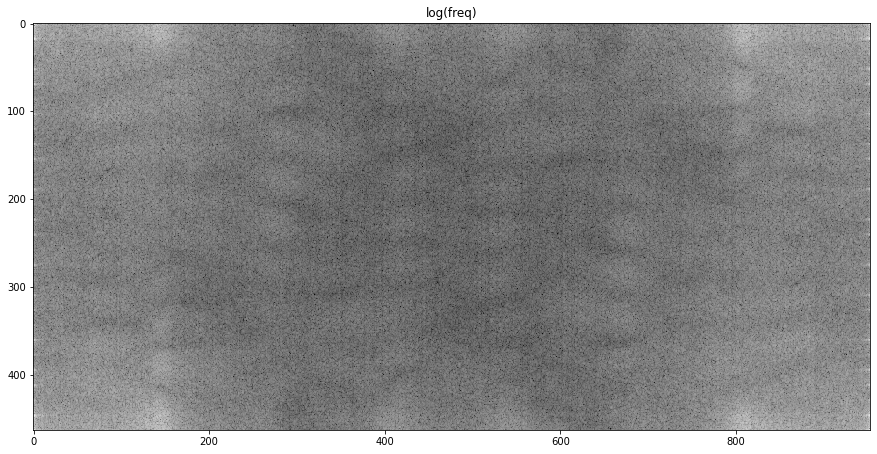

In [15]:
show_phase(freq_img_galia, scale=30)

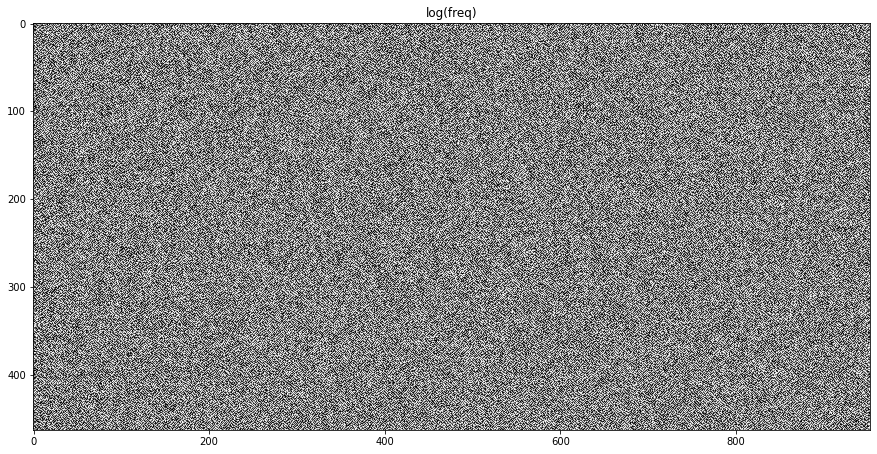

In [16]:
show_module(freq_img_galia, scale=30)

In [17]:
freq_pattern_galia = fft.fft2(pattern_galia)

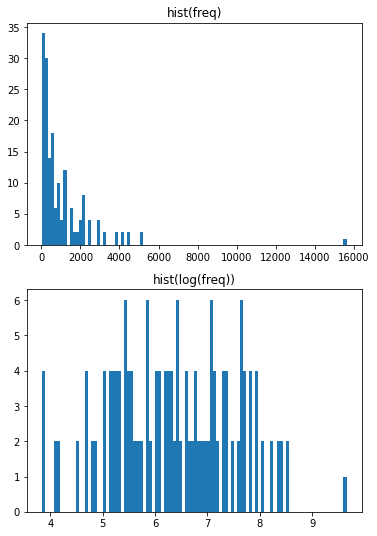

In [18]:
show_hist(freq_pattern_galia)

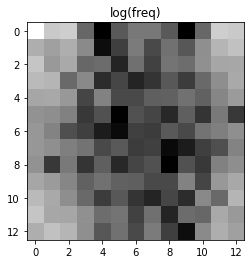

In [19]:
show_phase(freq_pattern_galia, scale=3)

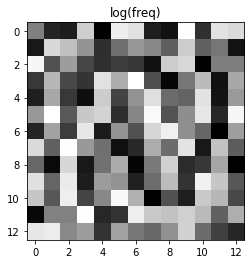

In [20]:
show_module(freq_pattern_galia, scale=3)

In [21]:
freq_img_fish = fft.fft2(img_fish)

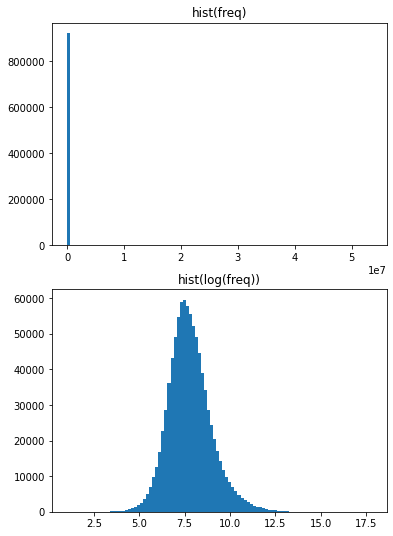

In [22]:
show_hist(freq_img_fish)

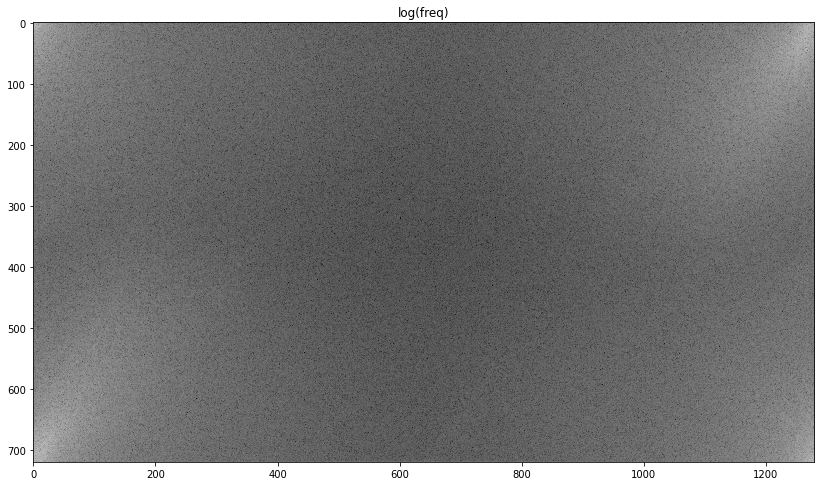

In [23]:
show_phase(freq_img_fish, scale=50)

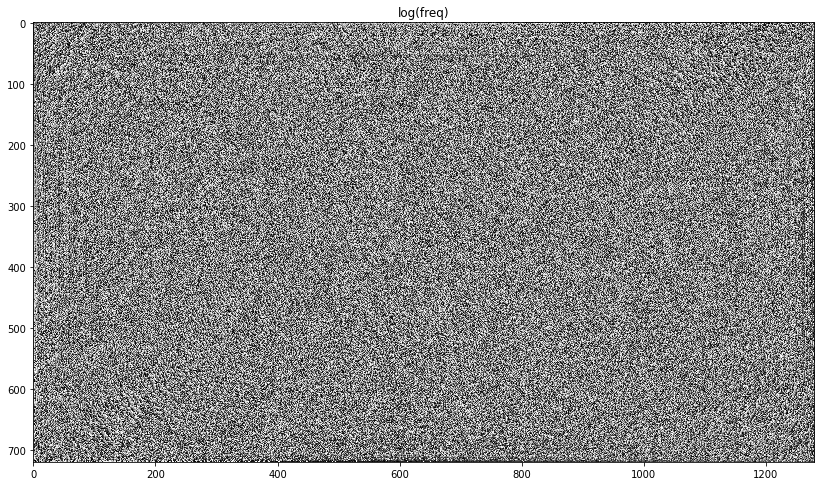

In [24]:
show_module(freq_img_fish, scale=50)

In [25]:
freq_pattern_fish = fft.fft2(pattern_fish)

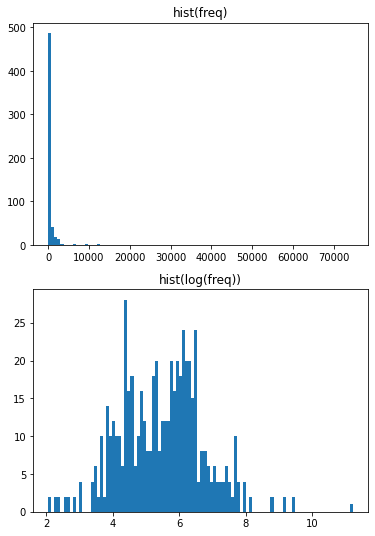

In [26]:
show_hist(freq_pattern_fish)

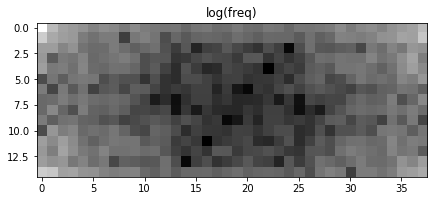

In [27]:
show_phase(freq_pattern_fish, scale=2)

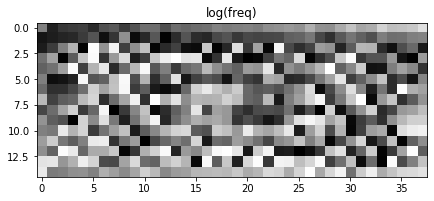

In [28]:
show_module(freq_pattern_fish, scale=2)

## Korelacja wzorca z obrazem 

In [29]:
def correlation(img, pattern):
    img_freq = fft.fft2(img) 
    pat_freq = fft.fft2(np.rot90(pattern,2), s=img.shape)
    corr = np.real(fft.ifft2(np.multiply(img_freq, pat_freq)))
    return corr

In [30]:
def get_mask(corr, threshold=0.5):
    return corr > (np.max(corr) * threshold)

In [31]:
def mask_img(img, mask):
    return np.multiply(img, mask)

In [32]:
def draw_rectangles(img_path, mask, rect_shape=None, scale=50):
    im = np.array(Image.open(img_path), dtype=np.uint8)
    fig,ax = plt.subplots(figsize=(mask.shape[0] // scale, mask.shape[1] // scale))
    ax.imshow(im)
    
    labeled = measure.label(mask, connectivity=2)
    props = measure.regionprops(labeled)
    for prop in props:
        min_row, min_col, max_row, max_col = prop.bbox
        if rect_shape is None:
            x, y = max_row - min_row, max_col - min_col
        else:
            x, y = rect_shape
            x, y = -x, -y

        rect = patches.Rectangle((min_col, min_row),y,x,linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)

    plt.show()

In [33]:
def count_found(mask):
    labeled = measure.label(mask, connectivity=2)
    return np.max(labeled)

#### Galia

In [34]:
corr_galia = correlation(img_galia, pattern_galia)

In [35]:
print(img_galia.shape)
print(pattern_galia.shape)
print(corr_galia.shape)

(463, 953)
(13, 13)
(463, 953)


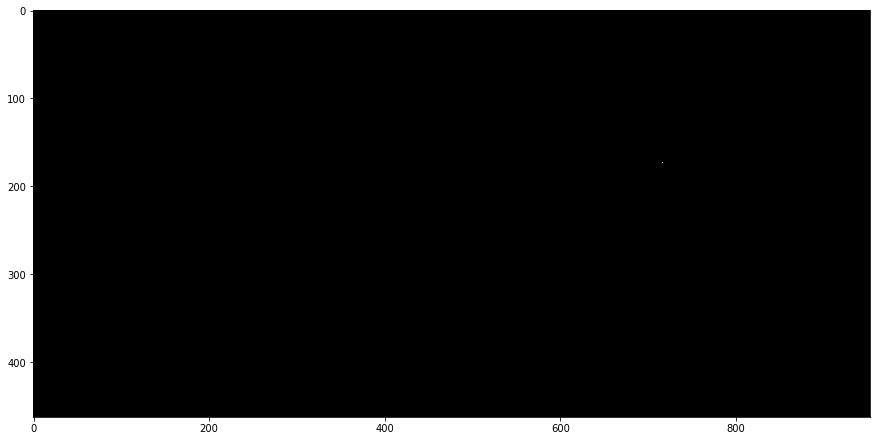

In [36]:
mask_galia = get_mask(corr_galia, threshold=0.9)
masked_img = mask_img(img_galia, mask_galia)
show_img(masked_img, scale=30)

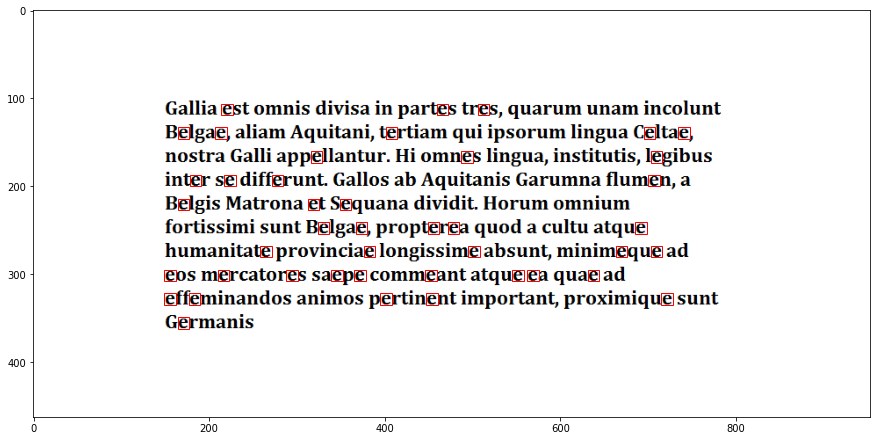

In [37]:
draw_rectangles(path_to_image_galia, mask_galia,rect_shape=(13,13), scale=30)

In [38]:
print('Pattern matched', count_found(mask_galia), 'times')

Pattern matched 43 times


#### Fish

In [39]:
corr = correlation(img_fish, pattern_fish)

In [40]:
print(img_fish.shape)
print(pattern_fish.shape)
print(corr.shape)

(720, 1280)
(15, 38)
(720, 1280)


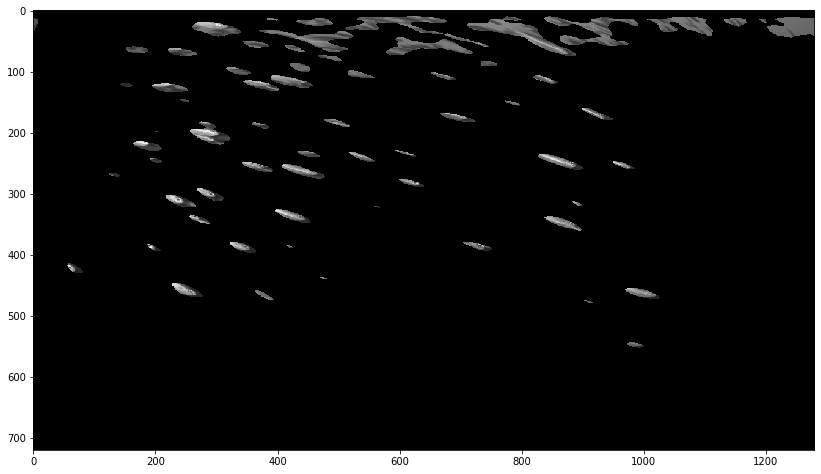

In [41]:
mask_fish = get_mask(corr, threshold=0.6)
masked_img_fish = mask_img(img_fish, mask_fish)
show_img(masked_img_fish, scale=50)

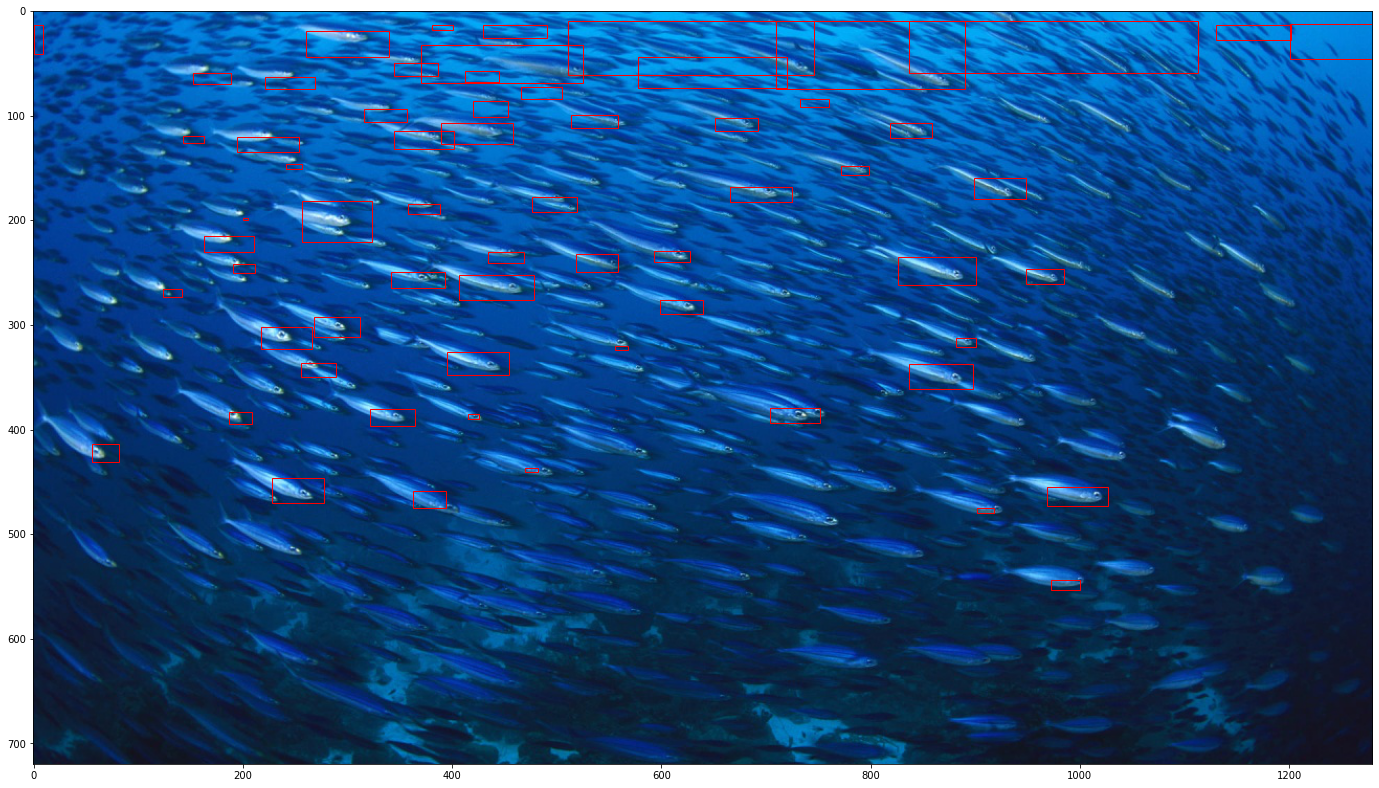

In [42]:
draw_rectangles(path_to_image_fish, mask_fish, scale=30)

In [43]:
print('Pattern matched', count_found(mask_fish), 'times')

Pattern matched 63 times
